### Distributed Data Analysis
*The aim of this assignment is to generate value and insight from the processing of heterogeneous data. This will be achieved by implementing several analytic methods/techniques/algorithms, evaluating them and comparing the effectiveness of the adopted approaches.*

#### Objective: 
*One High Performance Computational technique for distributed data analysis.*

#### PySpark: 
*PySpark is the Python API for Apache Spark, an open source, distributed computing framework and set of libraries for real-time, large-scale data processing*

In [13]:
import pyspark

In [14]:
import pandas as pd
import numpy as np

In [99]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql.functions import mean, desc

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
#Starting a PySpark Session
spark = SparkSession.builder.appName('IntroPySpark').getOrCreate()

In [18]:
spark

In [19]:
#Reading in the data
df = spark.read.csv('Life Expectancy Data.csv',header=True, inferSchema=True)

In [20]:
df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Life expectancy : double (nullable = true)
 |-- Adult Mortality: integer (nullable = true)
 |-- infant deaths: integer (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- percentage expenditure: double (nullable = true)
 |-- Hepatitis B: integer (nullable = true)
 |-- Measles : integer (nullable = true)
 |--  BMI : double (nullable = true)
 |-- under-five deaths : integer (nullable = true)
 |-- Polio: integer (nullable = true)
 |-- Total expenditure: double (nullable = true)
 |-- Diphtheria : integer (nullable = true)
 |--  HIV/AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |--  thinness  1-19 years: double (nullable = true)
 |--  thinness 5-9 years: double (nullable = true)
 |-- Income composition of resources: double (nullable = true)
 |-- Schooling: double (nullable = true)



In [21]:
type(df)

pyspark.sql.dataframe.DataFrame

In [22]:
df.columns

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [23]:
for life in df.head(5):
    print(life)
    print('\n')

Row(Country='Afghanistan', Year=2015, Status='Developing', Life expectancy =65.0, Adult Mortality=263, infant deaths=62, Alcohol=0.01, percentage expenditure=71.27962362, Hepatitis B=65, Measles =1154,  BMI =19.1, under-five deaths =83, Polio=6, Total expenditure=8.16, Diphtheria =65,  HIV/AIDS=0.1, GDP=584.25921, Population=33736494.0,  thinness  1-19 years=17.2,  thinness 5-9 years=17.3, Income composition of resources=0.479, Schooling=10.1)


Row(Country='Afghanistan', Year=2014, Status='Developing', Life expectancy =59.9, Adult Mortality=271, infant deaths=64, Alcohol=0.01, percentage expenditure=73.52358168, Hepatitis B=62, Measles =492,  BMI =18.6, under-five deaths =86, Polio=58, Total expenditure=8.18, Diphtheria =62,  HIV/AIDS=0.1, GDP=612.696514, Population=327582.0,  thinness  1-19 years=17.5,  thinness 5-9 years=17.5, Income composition of resources=0.476, Schooling=10.0)


Row(Country='Afghanistan', Year=2013, Status='Developing', Life expectancy =59.9, Adult Mortality=268

In [24]:
df.dtypes

[('Country', 'string'),
 ('Year', 'int'),
 ('Status', 'string'),
 ('Life expectancy ', 'double'),
 ('Adult Mortality', 'int'),
 ('infant deaths', 'int'),
 ('Alcohol', 'double'),
 ('percentage expenditure', 'double'),
 ('Hepatitis B', 'int'),
 ('Measles ', 'int'),
 (' BMI ', 'double'),
 ('under-five deaths ', 'int'),
 ('Polio', 'int'),
 ('Total expenditure', 'double'),
 ('Diphtheria ', 'int'),
 (' HIV/AIDS', 'double'),
 ('GDP', 'double'),
 ('Population', 'double'),
 (' thinness  1-19 years', 'double'),
 (' thinness 5-9 years', 'double'),
 ('Income composition of resources', 'double'),
 ('Schooling', 'double')]

In [25]:
pd.DataFrame(df.take(5), columns = df.columns)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [26]:
# Selecting only numeric variables from the dataset
numeric_features = [t[0] for t in df.dtypes if t[1].startswith("int")]

In [27]:
df.select(numeric_features).describe().toPandas()

,summary,Year,Adult Mortality,infant deaths,Hepatitis B,Measles,under-five deaths,Polio,Diphtheria
0,count,2938,2928,2938,2385,2938,2938,2919,2919
1,mean,2007.5187202178352,164.79644808743168,30.303948264125257,80.94046121593291,2419.5922396187884,42.0357385976855,82.55018842069202,82.32408359027065
2,stddev,4.613840940258099,124.2920790034219,117.92650131339906,25.070015593018063,11467.27248923461,160.4455484057337,23.428045949468476,23.7169120685726
3,min,2000,1,0,1,0,0,3,2
4,max,2015,723,1800,99,212183,2500,99,99


In [28]:
# Selecting only numeric variables from the dataset
numeric_features = [t[0] for t in df.dtypes if t[1].startswith("double")]
df.select(numeric_features).describe().toPandas()

,summary,Life expectancy,Alcohol,percentage expenditure,BMI,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,count,2928,2744,2938,2904,2712,2938,2490,2286,2904,2904,2771,2775
1,mean,69.22493169398912,4.6028607871720375,738.2512954533823,38.32124655647373,5.9381895280235915,1.7421034717494939,7483.158469138481,1.2753375120052498E7,4.8397038567493205,4.870316804407711,0.6275510645976166,11.992792792792786
2,stddev,9.523867487824305,4.052412658755658,1987.914858016194,20.044033502562083,2.498319672155633,5.077784531086547,14270.169341515959,6.101209650842794E7,4.420194947144322,4.508882086983007,0.2109035551515931,3.3589197211023554
3,min,36.3,0.01,0.0,1.0,0.37,0.1,1.68135,34.0,0.1,0.1,0.0,0.0
4,max,89.0,17.87,19479.91161,87.3,17.6,50.6,119172.7418,1.293859294E9,27.7,28.6,0.948,20.7


In [29]:
df_pandas = df.toPandas()

In [103]:
print('Average Life Expectancy in Pakistan over the years')
df.filter(df["Country"] == "Pakistan").groupBy("Year") .agg(mean("Life expectancy ").alias("average_life")).orderBy(desc("average_life")) .take(100)

Average Life Expectancy in Pakistan over the years


[Row(Year=2014, average_life=66.2),
 Row(Year=2013, average_life=66.0),
 Row(Year=2012, average_life=65.7),
 Row(Year=2011, average_life=65.5),
 Row(Year=2010, average_life=65.1),
 Row(Year=2009, average_life=64.8),
 Row(Year=2008, average_life=64.6),
 Row(Year=2007, average_life=64.4),
 Row(Year=2006, average_life=64.2),
 Row(Year=2004, average_life=63.7),
 Row(Year=2003, average_life=63.5),
 Row(Year=2005, average_life=62.9)]

In [102]:
print('Average Life Expectancy in Austria over the years')
df.filter(df["Country"] == "Austria").groupBy("Year") .agg(mean("Life expectancy ").alias("average_life")).orderBy(desc("average_life")) .take(100)

Average Life Expectancy in Austria over the years


[Row(Year=2011, average_life=88.0),
 Row(Year=2012, average_life=88.0),
 Row(Year=2010, average_life=84.0),
 Row(Year=2008, average_life=84.0),
 Row(Year=2009, average_life=82.0),
 Row(Year=2014, average_life=81.4),
 Row(Year=2013, average_life=81.1),
 Row(Year=2007, average_life=81.0),
 Row(Year=2006, average_life=79.8),
 Row(Year=2005, average_life=79.4),
 Row(Year=2004, average_life=79.3),
 Row(Year=2003, average_life=78.8),
 Row(Year=2002, average_life=78.7),
 Row(Year=2001, average_life=78.6),
 Row(Year=2000, average_life=78.1)]

In [104]:
print('Average Life Expectancy in Afghanistan over the years')
df.filter(df["Country"] == "Afghanistan").groupBy("Year") .agg(mean("Life expectancy ").alias("average_life")).orderBy(desc("average_life")) .take(100)

Average Life Expectancy in Afghanistan over the years


[Row(Year=2015, average_life=65.0),
 Row(Year=2013, average_life=59.9),
 Row(Year=2014, average_life=59.9),
 Row(Year=2012, average_life=59.5),
 Row(Year=2011, average_life=59.2),
 Row(Year=2010, average_life=58.8),
 Row(Year=2009, average_life=58.6),
 Row(Year=2008, average_life=58.1),
 Row(Year=2007, average_life=57.5),
 Row(Year=2005, average_life=57.3),
 Row(Year=2006, average_life=57.3),
 Row(Year=2004, average_life=57.0),
 Row(Year=2003, average_life=56.7),
 Row(Year=2002, average_life=56.2),
 Row(Year=2001, average_life=55.3),
 Row(Year=2000, average_life=54.8)]

### Exploratory Data Analysis 

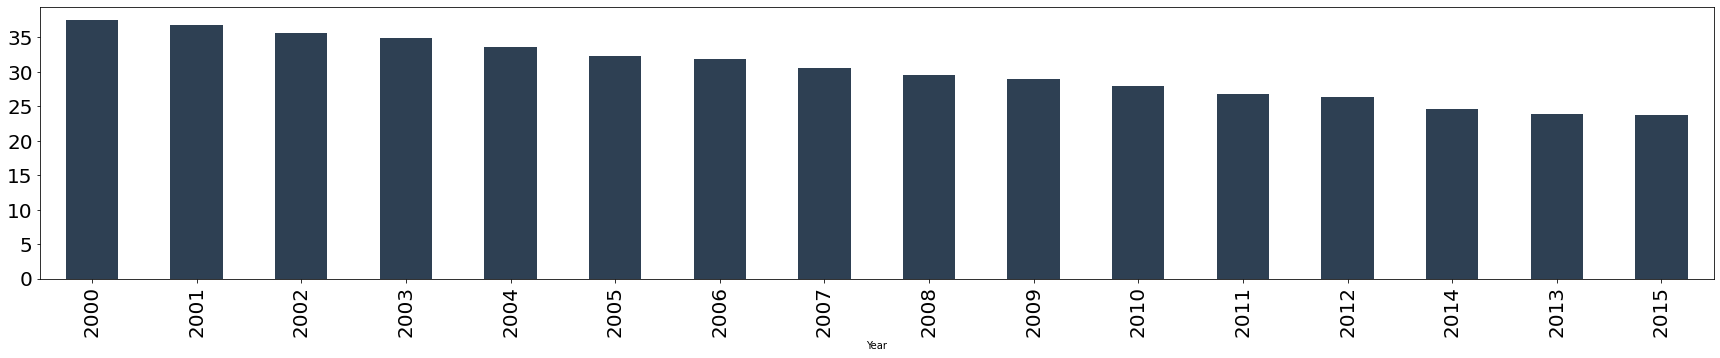

In [30]:
#Illustration of Infant deaths according to the years
plt.figure(figsize=(30,5))
val=df_pandas.groupby('Year')['infant deaths'].mean()[:20].sort_values(ascending=False).plot(kind='bar',fontsize=20,color='#2e4053')

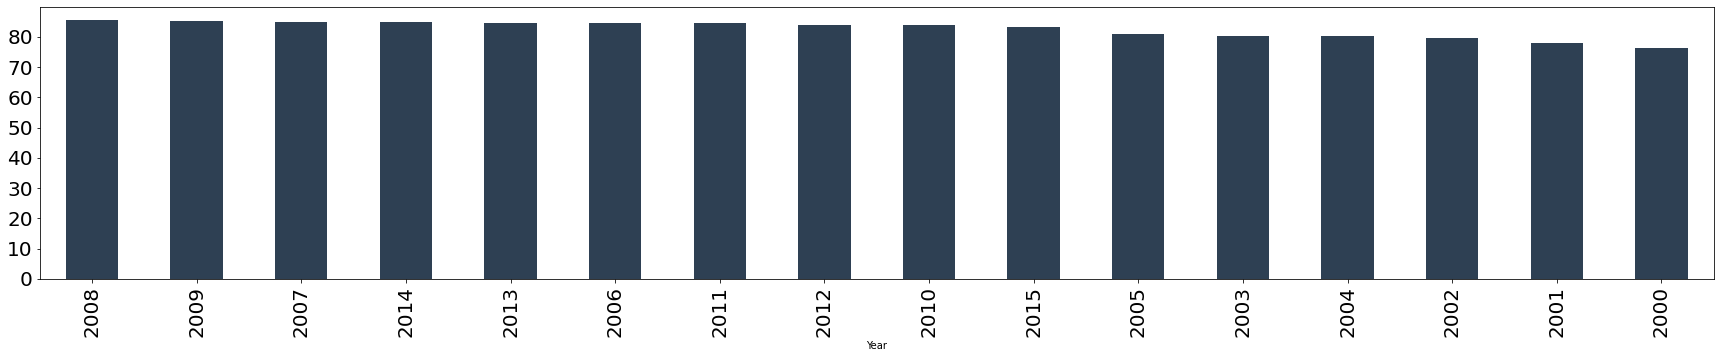

In [31]:
#Top 20 years with polio.
plt.figure(figsize=(30,5))
val=df_pandas.groupby('Year')['Polio'].mean()[:20].sort_values(ascending=False).plot(kind='bar',fontsize=20,color='#2e4053')

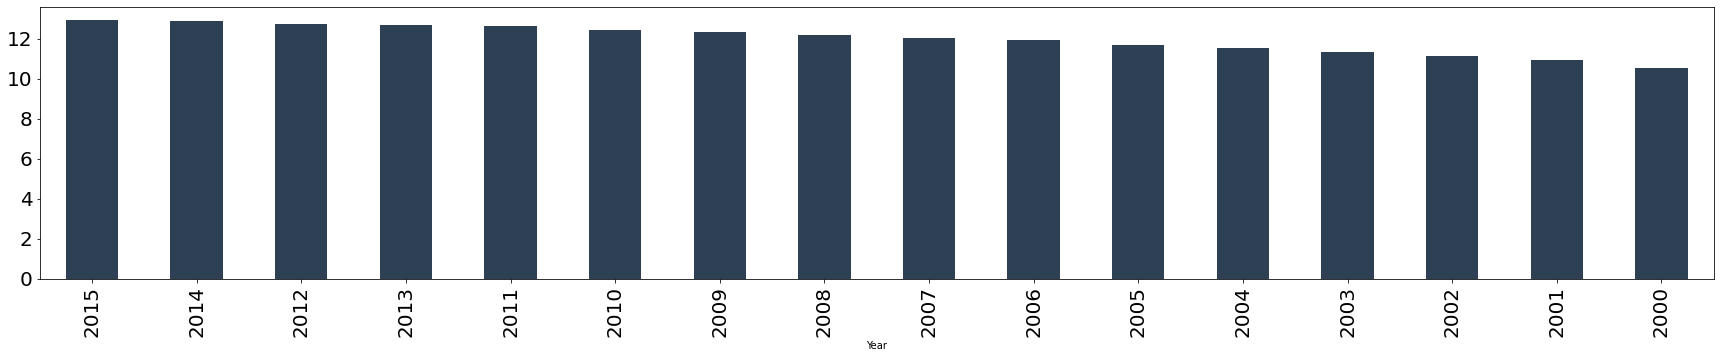

In [32]:
#Illustration on the basis of Schooling
plt.figure(figsize=(30,5))
val=df_pandas.groupby('Year')['Schooling'].mean()[:20].sort_values(ascending=False).plot(kind='bar',fontsize=20,color='#2e4053')

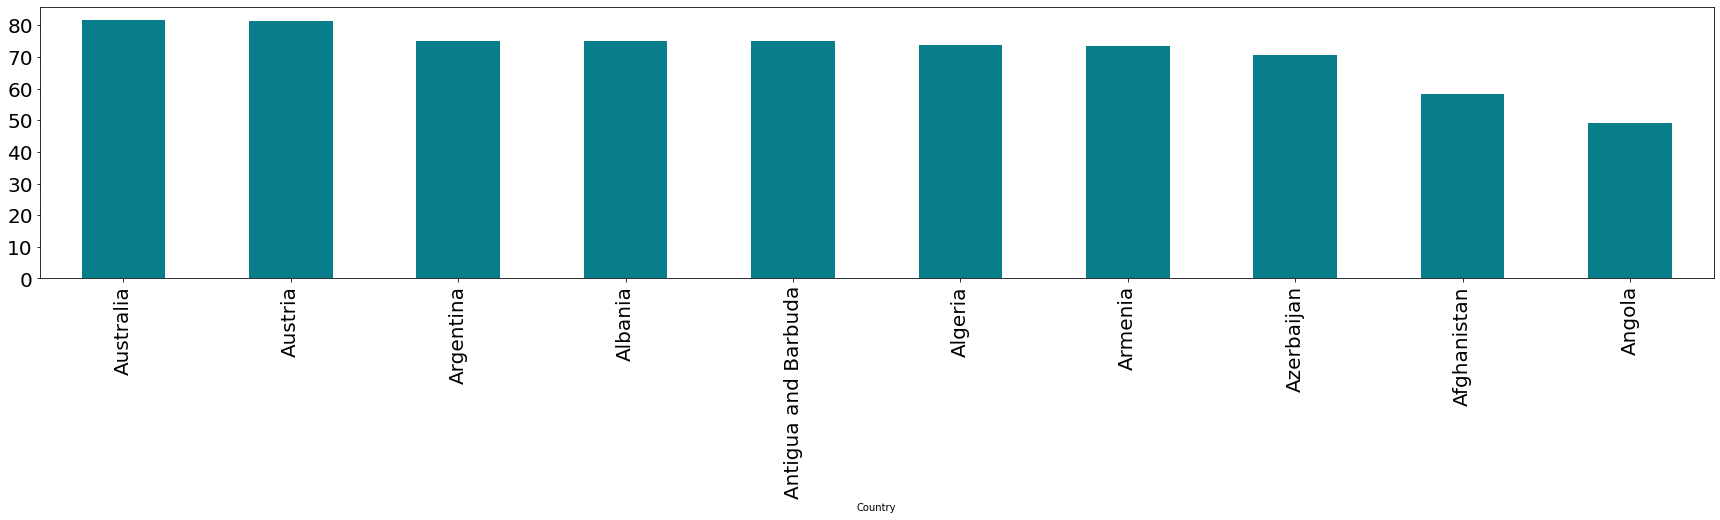

In [33]:
#Top 10 countries with life-expendancy.
plt.figure(figsize=(30,5))
val=df_pandas.groupby('Country')['Life expectancy '].mean()[:10].sort_values(ascending=False).plot(kind='bar',fontsize=20, color='#087E8B')

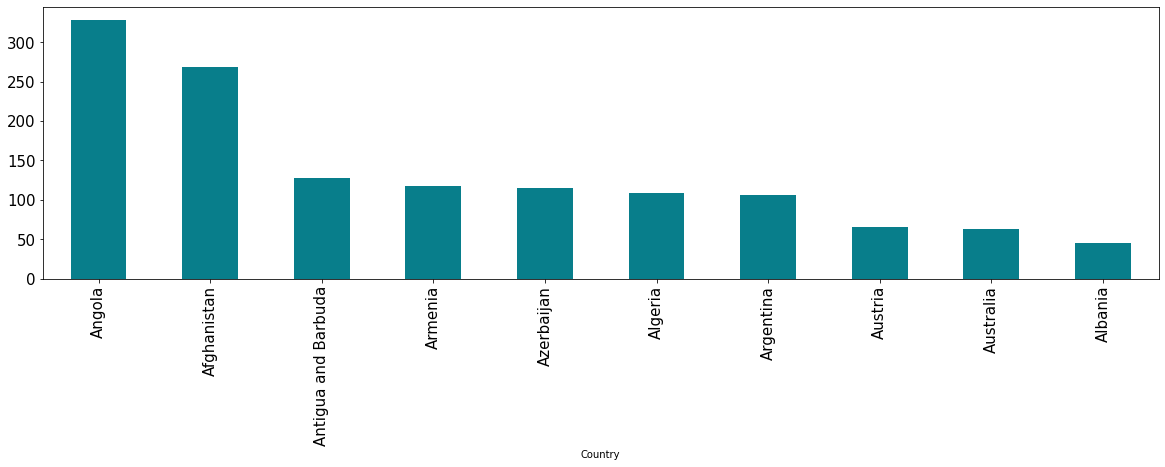

In [34]:
# Top 10 countries on adult morality
plt.figure(figsize=(20,5))
val=df_pandas.groupby('Country')['Adult Mortality'].mean()[:10].sort_values(ascending=False).plot(kind='bar',fontsize=15, color='#087E8B')

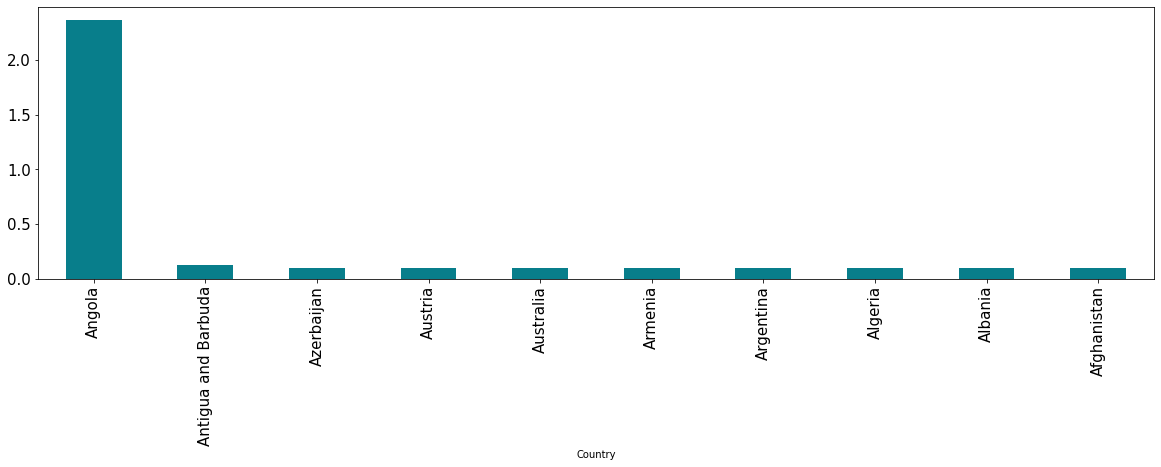

In [35]:
# Top 10 countries on adult HIV/AIDS
plt.figure(figsize=(20,5))
val=df_pandas.groupby('Country')[' HIV/AIDS'].mean()[:10].sort_values(ascending=False).plot(kind='bar',fontsize=15, color='#087E8B')

<AxesSubplot:xlabel='Status'>

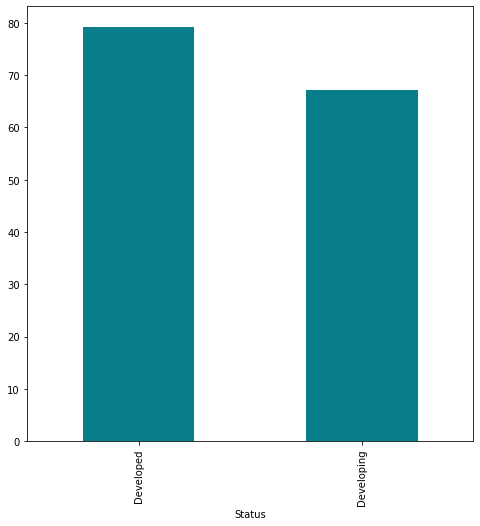

In [105]:
#Identifying relationship between Country Status and Life Expectancy 
plt.figure(figsize=(8,8))
df_pandas.groupby(['Status'])['Life expectancy '].mean().plot(kind='bar', color='#087E8B')

<AxesSubplot:>

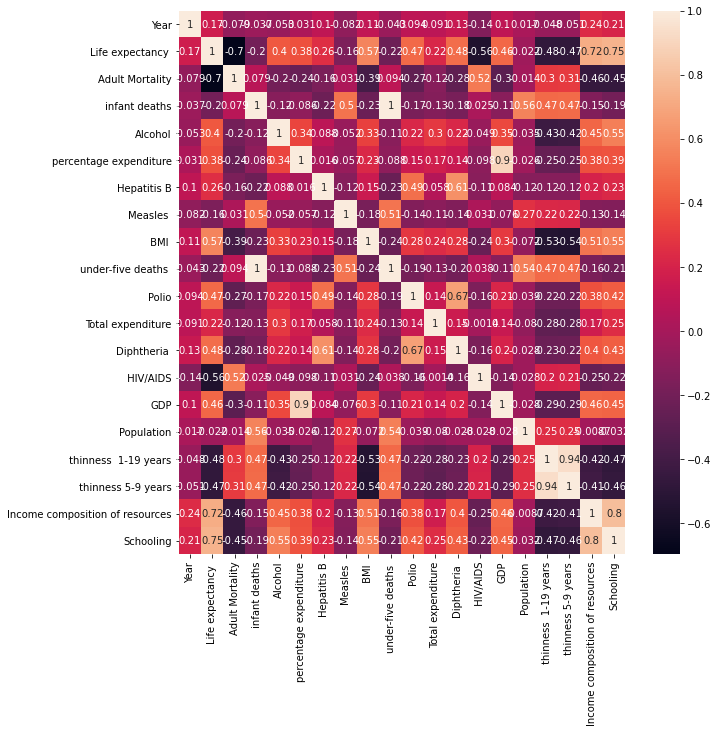

In [107]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df_pandas.corr(),annot=True)

In [36]:
print((df.count(), len(df.columns)))

(2938, 22)


In [37]:
#Dropping null value rows
df = df.na.drop()

In [38]:
print((df.count(), len(df.columns)))

(1649, 22)


In [39]:
df.groupBy('Status').count().show()

+----------+-----+
|    Status|count|
+----------+-----+
| Developed|  242|
|Developing| 1407|
+----------+-----+



##### Transforming the Status Column 

In [40]:
from pyspark.ml.feature import StringIndexer

In [41]:
indexer = StringIndexer(inputCol='Status',outputCol='Status_cat')

In [42]:
indexed = indexer.fit(df).transform(df)

In [43]:
for life in indexed.head(2):
    print(life)
    print('\n')

Row(Country='Afghanistan', Year=2015, Status='Developing', Life expectancy =65.0, Adult Mortality=263, infant deaths=62, Alcohol=0.01, percentage expenditure=71.27962362, Hepatitis B=65, Measles =1154,  BMI =19.1, under-five deaths =83, Polio=6, Total expenditure=8.16, Diphtheria =65,  HIV/AIDS=0.1, GDP=584.25921, Population=33736494.0,  thinness  1-19 years=17.2,  thinness 5-9 years=17.3, Income composition of resources=0.479, Schooling=10.1, Status_cat=0.0)


Row(Country='Afghanistan', Year=2014, Status='Developing', Life expectancy =59.9, Adult Mortality=271, infant deaths=64, Alcohol=0.01, percentage expenditure=73.52358168, Hepatitis B=62, Measles =492,  BMI =18.6, under-five deaths =86, Polio=58, Total expenditure=8.18, Diphtheria =62,  HIV/AIDS=0.1, GDP=612.696514, Population=327582.0,  thinness  1-19 years=17.5,  thinness 5-9 years=17.5, Income composition of resources=0.476, Schooling=10.0, Status_cat=0.0)




### Feature Engineering

In [44]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [45]:
indexed.columns

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Status_cat']

In [46]:
assembler = VectorAssembler(inputCols=[
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 ' HIV/AIDS',
 'GDP',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Status_cat'],outputCol='features')

In [47]:
output = assembler.transform(indexed)

In [48]:
output.select('features','Life expectancy ').show()

+--------------------+----------------+
|            features|Life expectancy |
+--------------------+----------------+
|[65.0,263.0,62.0,...|            65.0|
|[59.9,271.0,64.0,...|            59.9|
|[59.9,268.0,66.0,...|            59.9|
|[59.5,272.0,69.0,...|            59.5|
|[59.2,275.0,71.0,...|            59.2|
|[58.8,279.0,74.0,...|            58.8|
|[58.6,281.0,77.0,...|            58.6|
|[58.1,287.0,80.0,...|            58.1|
|[57.5,295.0,82.0,...|            57.5|
|[57.3,295.0,84.0,...|            57.3|
|[57.3,291.0,85.0,...|            57.3|
|[57.0,293.0,87.0,...|            57.0|
|[56.7,295.0,87.0,...|            56.7|
|[56.2,3.0,88.0,0....|            56.2|
|[55.3,316.0,88.0,...|            55.3|
|[54.8,321.0,88.0,...|            54.8|
|[77.8,74.0,0.0,4....|            77.8|
|[77.5,8.0,0.0,4.5...|            77.5|
|[77.2,84.0,0.0,4....|            77.2|
|[76.9,86.0,0.0,5....|            76.9|
+--------------------+----------------+
only showing top 20 rows



In [51]:
type(output)

pyspark.sql.dataframe.DataFrame

### Linear Regression 

In [52]:
final_data = output.select('features','Life expectancy ')

In [53]:
train_data,test_data = final_data.randomSplit([0.8,0.2])

In [54]:
train_data.describe().show()

+-------+-----------------+
|summary| Life expectancy |
+-------+-----------------+
|  count|             1332|
|   mean|69.12334834834836|
| stddev|8.872426828437078|
|    min|             44.0|
|    max|             89.0|
+-------+-----------------+



In [55]:
test_data.describe().show()

+-------+-----------------+
|summary| Life expectancy |
+-------+-----------------+
|  count|              317|
|   mean|70.05425867507888|
| stddev|8.443997709179122|
|    min|             44.8|
|    max|             89.0|
+-------+-----------------+



In [56]:
from pyspark.ml.regression import LinearRegression

In [57]:
lr = LinearRegression(labelCol='Life expectancy ')

In [58]:
lrModel = lr.fit(train_data)

In [59]:
# Print the coefficients and intercept for linear regression
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [0.9999999999999397,-7.610775718801942e-16,5.511486407153897e-15,-1.6074138085495446e-14,-1.8653980077386597e-16,-4.098813301585452e-15,-1.8783016903994845e-15,-1.114622361636502e-14,-2.771195028247485e-14,2.2279792192771897e-18,4.452232143690214e-15,-6.89012620059371e-15,-2.204868509779979e-13,1.6687734145454919e-13,-1.0200443321878807e-14] Intercept: 2.7822458956713387e-12


#### Evaluation

In [60]:
test_results = lrModel.evaluate(test_data)

In [61]:
print("RMSE: {}".format(test_results.rootMeanSquaredError))
print("MSE: {}".format(test_results.meanSquaredError))
print("R2: {}".format(test_results.r2))

RMSE: 2.8506785587146515e-13
MSE: 8.126368245115443e-26
R2: 1.0


#### Correlation

In [62]:
from pyspark.sql.functions import corr

In [63]:
df.select(corr('Life expectancy ','infant deaths')).show()

+-------------------------------------+
|corr(Life expectancy , infant deaths)|
+-------------------------------------+
|                  -0.1690738039995967|
+-------------------------------------+



In [64]:
df.select(corr('Life expectancy ',' HIV/AIDS')).show()

+---------------------------------+
|corr(Life expectancy ,  HIV/AIDS)|
+---------------------------------+
|              -0.5922362925926357|
+---------------------------------+



In [65]:
df.select(corr('Life expectancy ','Adult Mortality')).show()

+---------------------------------------+
|corr(Life expectancy , Adult Mortality)|
+---------------------------------------+
|                    -0.7025230623069735|
+---------------------------------------+



*The above results show negative correlation,negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa. For instance the increase in HIV/AIDS will result in low life expectancy* 

### Random Forest Regressor

In [73]:
from pyspark.ml.regression import RandomForestRegressor

In [74]:
lr_model2 = RandomForestRegressor(labelCol='Life expectancy ')

In [75]:
model = lr_model2.fit(train_data)

In [77]:
predictions = model.transform(test_data)

In [79]:
predictions.show()

+--------------------+----------------+------------------+
|            features|Life expectancy |        prediction|
+--------------------+----------------+------------------+
|[44.8,666.0,5.0,1...|            44.8| 47.35224542961898|
|[45.1,615.0,40.0,...|            45.1| 48.18364145357143|
|[46.0,66.0,39.0,1...|            46.0| 49.49347642758192|
|[46.0,665.0,24.0,...|            46.0| 47.17650679325534|
|[46.2,441.0,29.0,...|            46.2| 50.09274962690305|
|[47.8,564.0,3.0,5...|            47.8|   47.643761925442|
|[48.1,424.0,27.0,...|            48.1|50.048922462910085|
|[48.1,652.0,2.0,4...|            48.1| 49.21756318251827|
|[48.4,536.0,3.0,7...|            48.4|47.029477126907196|
|[49.7,411.0,25.0,...|            49.7| 50.97347060420676|
|[51.1,527.0,4.0,2...|            51.1| 52.09099949534171|
|[51.8,367.0,46.0,...|            51.8|51.741994283228244|
|[53.0,432.0,72.0,...|            53.0| 51.87515370860713|
|[53.0,439.0,16.0,...|            53.0| 51.3509116702720

In [82]:
from pyspark.ml.evaluation import RegressionEvaluator

In [84]:
evaluator = RegressionEvaluator(
    labelCol="Life expectancy ", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 1.49331


In [95]:
df.filter(df["Country"] == "Afghanistan").groupBy("Year") .agg(mean("Life expectancy ").alias("average_life")).orderBy(desc("average_life")) .take(100)

[Row(Year=2015, average_life=65.0),
 Row(Year=2013, average_life=59.9),
 Row(Year=2014, average_life=59.9),
 Row(Year=2012, average_life=59.5),
 Row(Year=2011, average_life=59.2),
 Row(Year=2010, average_life=58.8),
 Row(Year=2009, average_life=58.6),
 Row(Year=2008, average_life=58.1),
 Row(Year=2007, average_life=57.5),
 Row(Year=2005, average_life=57.3),
 Row(Year=2006, average_life=57.3),
 Row(Year=2004, average_life=57.0),
 Row(Year=2003, average_life=56.7),
 Row(Year=2002, average_life=56.2),
 Row(Year=2001, average_life=55.3),
 Row(Year=2000, average_life=54.8)]